<a href="https://colab.research.google.com/github/sominshim/Predicting_Personality_through_Text/blob/somin/preprocessing_kor_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install kss
!pip install soynlp
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install git+https://github.com/ssut/py-hanspell.git
!pip install konlpy

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-cywsp0fz
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-cywsp0fz
  Created wheel for pykospacing: filename=pykospacing-0.4-cp36-none-any.whl size=2255638 sha256=c04a57668b8be8556d140f00659a5c6aade35eb03a2d3760686a718c1df5a6f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-sdiama3c/wheels/4d/45/58/e26cb2b7f6a063d234158c6fd1e5700f6e15b99d67154340ba
Successfully built pykospacing
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-_wj96q0k
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-_wj96q0k
  Created wheel for py-hanspell: filename=py_hanspell-1.1-cp36-none-any.whl size=4854 sha256=77869a6528d90bdd9ab599882e0b7371f97831f4b94d1202b58c134038852737
  Stored in directory: /tmp/pip-ephem-wheel-cache-pkzpmqso/wheels/0a/25/d1/e5e96476dbb1c318cc26c992dd493394fe42b0c204b3e65588
Successfully built py-hans

## NLP Preprocessing란?
NLP 전처리는 정해진 정답이 없으며 데이터와 목적에 따라 달라집니다. 이 과정은 주로 모델의 입력인 단어,문장,문서의 vector를 만들기 전에 진행이 되며 이번 노트북에서는 대부분의 NLP에 널리 쓰이는 방법들을 간단한 코드 예제와 함께 다루어보도록 하겠습니다.
일반적인 NLP 전처리의 과정을 이번 신문기사 분류 대회에 적용해 보겠습니다.

데이터를 불러온 후 각 신문기사들을 눈으로 확인하며 특수문자, 불용어 그리고 문장 구조에 대한 감을 잡습니다.


문제의 목적과 분석자의 재량에 따라 불용어를 설정하고 리스트에 저장합니다. 이번 대회에서는 특수 문자와 조사만 제거해도 어느 정도 높은 정확도를 얻을 수 있습니다.


불용어 이외의 특수 문자들을 제거합니다. 이번 대회를 위해 저는 정규표현식 패키지(re)를 사용하여 한글과 영어 소문자를 제외한 모든 글자들을 제거하였습니다.


형태소 분석을 통해 문장을 형태소 단위의 토큰으로 분리합니다. 이때 내가 설정한 불용어들을 결과로 반환해주는 형태소 분석기를 사용하셔야 합니다. 예를 들어 조사를 불용어로 설정하였는데 조사를 분리해주지 못하는 형태소 분석기는 후보에서 제외하시면 됩니다.


형태소 단위의 토큰들을 기반으로 리스트에 저장된 불용어를 제거합니다.


## EDA

In [3]:
data = pd.read_csv("/content/drive/My Drive/data/mbti_total_withoutUserName.csv")
data.head()

,type,posts
0,ESTP,1. 최근 카페의 질의응답 게시판에 지속적으로 등업을 요구하는 글이 올라오고 있습니...
1,INFP,"제게 큰 현타를 주었던 글이에요.제 자신이 마음에 안 들고,늘 부족한 것 같고,절대..."
2,ISFJ,"유고슬라비아는 남슬라브 국가들(세르비아, 슬로베니아, 크로아티아, 보스니아, 북마케..."
3,ISTP,10대 여자고 키도 크고 나이에 비해 성숙한 이미지를 가지고 있어요. 잇팁답게 차갑...
4,ISFP,제가 요즘 끌리는 남자가있는데 esfp인거같아요esfj인줄 알았는데 상황에따라 행동...


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


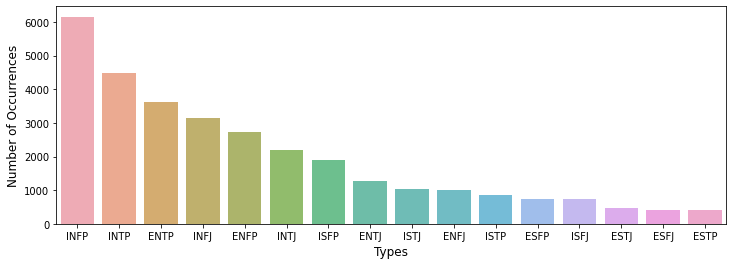

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

cnt_srs = data['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [5]:
data.dropna(axis=0, inplace=True)

In [6]:
data.reset_index(inplace=True)
data

,index,type,posts
0,0,ESTP,1. 최근 카페의 질의응답 게시판에 지속적으로 등업을 요구하는 글이 올라오고 있습니...
1,1,INFP,"제게 큰 현타를 주었던 글이에요.제 자신이 마음에 안 들고,늘 부족한 것 같고,절대..."
2,2,ISFJ,"유고슬라비아는 남슬라브 국가들(세르비아, 슬로베니아, 크로아티아, 보스니아, 북마케..."
3,3,ISTP,10대 여자고 키도 크고 나이에 비해 성숙한 이미지를 가지고 있어요. 잇팁답게 차갑...
4,4,ISFP,제가 요즘 끌리는 남자가있는데 esfp인거같아요esfj인줄 알았는데 상황에따라 행동...
...,...,...,...
27563,31133,INFJ,나는 이 카페서 글보고 덧글달고 글쓰는 반면옆의 친구(ISTJ)는 축구보고 뉴스보고...
27564,31134,ENFJ,10년넘은 친구가 있는데 그친구의 성격으로 제가 추측해봤을 때 그 친구는 E*FP였...
27565,31135,INFJ,"구성지음, 갈라놓음. istj가 아닐까요.어느날 제가 목이 말라서 친구녀석에게 물좀..."
27566,31136,ISTJ,이런 유형의 비슷한 질문이 있기는 했지만 대부분 ISTJ 남자와 잘맞을 거 같은 여...


In [7]:
length = data['posts'].astype(str).apply(len)

# 한국어 텍스트 전처리

- Basic
- Tokenize
-Spell Check
-Pos Tag
-Stemming
-Stopwords
-Negation


출처: https://ebbnflow.tistory.com/246 [ebb and flow]

Text(0, 0.5, 'Number of post')

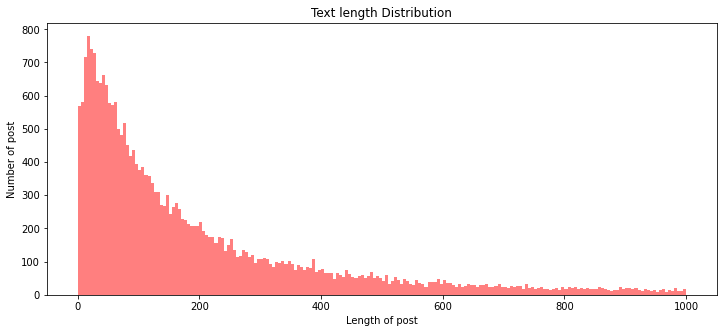

In [12]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
plt.hist(length, bins=200, alpha=0.5, color= 'r', range=(0, 1000))
plt.title('Text length Distribution')
plt.xlabel('Length of post')
plt.ylabel('Number of post')

In [13]:
print('리뷰 길이 최대 값: {}'.format(np.max(length)))
print('리뷰 길이 최소 값: {}'.format(np.min(length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(length)))
print('리뷰 길이 중간 값: {}'.format(np.median(length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(length, 75)))

리뷰 길이 최대 값: 25981
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 322.17
리뷰 길이 표준편차: 672.61
리뷰 길이 중간 값: 130.0
리뷰 길이 제 1 사분위: 51.0
리뷰 길이 제 3 사분위: 323.0


In [24]:
df = data.copy()
df = df[df.posts.str.len()>50]

In [25]:
df.shape

(20752, 3)

## Basic
- 기초적인 전처리,
- html tag 제거(크롤링한 데이터일경우)
- 숫자, 영어, 특수문자 등 필요하지 않은 언어 제거
- Lowercasing
- "@%*=()/+ 와 같은 punctuation(문장부호) 제거


In [26]:
import re 
import kss 
from hanspell import spell_checker
from tqdm import tqdm_notebook
from soynlp.normalizer import * 

def preprocessing(post, tokenizer, remove_stopwords = False, stop_words = []): 
  # 1. 한글 및 공백을 제외한 문자 모두 제거.
  post = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", post)
  
  # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
  post = tokenizer.morphs(post, stem=True)
  
  if remove_stopwords:
    # 불용어 제거(선택적)
    post = [token for token in post if not token in stop_words]
        
  return post
  
  # clean_post=''
  # for sent in kss.split_sentences(post): # seperate sentence
  #   spelled_sent = spell_checker.check(sent) # make misspell word correct

  #   spelled_sent = repeat_normalize(str(spelled_sent.checked), num_repeats=2) # 반복되는 글자 2개로 변경
  #   clean_post += spelled_sent+'. '
  
  # # for index, row in tqdm_notebook(df.iterrows()):
  # #   row['posts'] = repeat_normalize(str(row['posts']), num_repeats=2)

  # return clean_post

In [27]:
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Mecab
from konlpy.tag import Twitter

stop_words = [ '은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한']
tokenizer = Okt()
clean_train_review = []

for review in tqdm_notebook(df['posts']):
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, tokenizer, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


In [28]:
clean_train_review

[['최근',
  '카페',
  '질의',
  '응답',
  '게시판',
  '에',
  '지속',
  '적',
  '으로',
  '등업',
  '을',
  '요구',
  '하다',
  '글',
  '올라오다',
  '있다',
  '엠헬',
  '가입',
  '인사',
  '코너',
  '에',
  '개',
  '댓글',
  '을',
  '달',
  '면',
  '별도',
  '요청',
  '글',
  '없이',
  '자동',
  '적',
  '으로',
  '등업',
  '되다',
  '시스템',
  '이다',
  '규정',
  '을',
  '읽다',
  '않다',
  '올라오다',
  '무조건',
  '적',
  '인',
  '등업',
  '요청',
  '글',
  '에',
  '대해',
  '스탭',
  '별도',
  '안내',
  '를',
  '드리다',
  '않다',
  '규정',
  '숙지',
  '하다',
  '즐겁다',
  '엠헬',
  '활동',
  '하다',
  '바라다',
  '신고',
  '게시',
  '글',
  '에',
  '잇따르다',
  '동성애',
  '및',
  '종교',
  '에',
  '관련',
  '내용',
  '올라오다',
  '있다',
  '종교',
  '및',
  '성',
  '지향성',
  '에',
  '대한',
  '개인',
  '신념',
  '모두',
  '존중',
  '받다',
  '마땅하다',
  '심리',
  '카페인',
  '엠헬',
  '에서',
  '에',
  '대한',
  '논쟁',
  '지나치다',
  '깊다',
  '이뤄지다',
  '카페',
  '취지',
  '에',
  '어긋나다',
  '카페',
  '내의',
  '질서',
  '와',
  '평화',
  '를',
  '위해',
  '앞',
  '으로',
  '자신',
  '인적',
  '소개',
  '용',
  '으로',
  '간단하다',
  '언급',
  '되다',
  '아니다',
  '논쟁',
  '을',
  '위',
  '종교',
  '성

In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
sequences = tokenizer.texts_to_sequences(clean_train_review)
labels = np.array(pd.get_dummies(df['type'])) # 학습 데이터의 라벨

In [45]:
MAX_SEQUENCE_LENGTH = 100 # 문장 최대 길이

train_inputs = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 학습 데이터를 벡터화

In [46]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

input_data = train_inputs
label_data = train_labels
word_vocab = tokenizer.word_index

In [47]:
TEST_SPLIT = 0.25
RNG_SEED = 13371447
VOCAB_SIZE = len(word_vocab) + 1
EMB_SIZE = 128
BATCH_SIZE = 16
NUM_EPOCHS = 1

In [48]:
input_train, input_eval, label_train, label_eval = train_test_split(input_data, label_data, test_size=TEST_SPLIT, random_state=RNG_SEED)

In [49]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(LinearSVC(), n_jobs=1)
clf.fit(input_train, label_train)
prediction = clf.predict(input_eval)
print('Test accuracy is {}'.format(accuracy_score(label_eval, prediction)))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Test accuracy is 0.014841942945258289


In [42]:
from sklearn.metrics import accuracy_score
prediction = clf.predict(input_eval)
print('Test accuracy is {}'.format(accuracy_score(label_eval, prediction)))

Test accuracy is 0.0279491133384734


In [126]:
for index, row in tqdm_notebook(df.iterrows()):
  print('before : ', row['posts'])
  text = clean_punc(row['posts'], punct, punct_mapping)
  row['posts'] = clean_text(row['posts'])
  print('after : ', row['posts'])
  # print(kss.split_sentences(clean_text(row['posts'])))
  # break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


before :  1. 최근 카페의 질의응답 게시판에 지속적으로 등업을 요구하는 글이 올라오고 있습니다. 엠헬은 가입인사 코너에 3개의 댓글을 달면 별도의 요청글 없이 자동적으로 등업이 되는 시스템입니다.규정을 읽지 않고 올라오는 무조건적인 등업 요청글에 대해 스탭은 별도의 안내를 드리지 않겠습니다. 규정 숙지하시고 즐거운 엠헬 활동하시길 바라겠습니다. 2. 신고 게시글에 잇따른 동성애 및 종교에 관련한 내용이 올라오고 있습니다.종교 및 성지향성에 대한 개인의 신념은 모두 존중받아 마땅하나 '심리' 카페인 엠헬에서 이에 대한 논쟁이 지나치게 깊게 이뤄지는 것은 카페 취지에 어긋납니다. 카페 내의 질서와 평화를 위해 앞으로 자신의 인적 소개용으로 간단하게 언급되는게 아닌 논쟁을 위한 종교, 성지향성 글은 발견되면 무통보 삭제하도록 하겠습니다. 읽어주셔서 감사합니다.
after :  최근 카페의 질의응답 게시판에 지속적으로 등업을 요구하는 글이 올라오고 있습니다. 엠헬은 가입인사 코너에 개의 댓글을 달면 별도의 요청 글 없이 자동적으로 등업이 되는 시스템입니다. 규정을 읽지 않고 올라오는 무조건적인 등업 요청 글에 대해 스태프는 별도의 안내를 드리지 않겠습니다. 규정 숙지하시고 즐거운 엠헬 활동하시길 바라겠습니다. 신고 게시글에 잇따른 동성애 및 종교에 관련한 내용이 올라오고 있습니다. 종교 및 성지 향상에 대한 개인의 신념은 모두 존중받아 마땅하나 심리 카페인 엠헬에서 이에 대한 논쟁이 지나치게 깊게 이뤄지는 것은 카페 취지에 어긋납니다. 카페 내의 질서와 평화를 위해 앞으로 자신의 인적 소개용으로 간단하게 언급되는 게 아닌 논쟁을 위한 종교 성지향성 글은 발견되면 무통보 삭제하도록 하겠습니다. 읽어주셔서 감사합니다. 
before :  제게 큰 현타를 주었던 글이에요.제 자신이 마음에 안 들고,늘 부족한 것 같고,절대 사랑할 수 없는 사람이 저였는데,이 글을 읽고 '아하' 무릎을 쳤어요.10대 후반까지도진짜 제가 누구인지 모를 때주변에서 제게 주었던 평가들로나

In [97]:
df

,type,posts
0,ESTP,최근 카페의 질의응답 게시판에 지속적으로 등업을 요구하는 글이 올라오고 있습니다. ...
1,INFP,제게 큰 연타를 주었던 글이에요. 제 자신이 마음에 안 들고 늘 부족한 것 같고 절...
2,ISFJ,유고슬라비아는 남 슬라브 국가들 세르비아 슬로베니아 크로아티아 보스니아 북마케도니아...
3,ISTP,대 여자고 키도 크고 나이에 비해 성숙한 이미지를 가지고 있어요. 잇팁답게 차갑고 ...
4,ISFP,제가 요즘 끌리는 남자가 있는데 인 거 같아요. 인줄 알았는데 상황에 따라 행동 변...
...,...,...
94,INTJ,detailhkdvjc나 와 닮은 위인은 poomangcom 너무나 매력적인 그녀 🖤.
95,ENTP,이유는 너처럼 살면 세상 아무 생각 없고 편해 보여서 ㅋㅋ그럴지도 😁.
96,INTJ,detailxpmkrc 친구 유형 테스트 poomangcom.
97,ISTJ,어떨 것 같나요.


In [98]:
df=df[df.posts.str.len()>5]

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text2sequence(train_text, max_len=100):
    
    tokenizer = Tokenizer() #keras의 vectorizing 함수 호출
    tokenizer.fit_on_texts(str(train_text)) #train 문장에 fit
    train_X_seq = tokenizer.texts_to_sequences(str(train_text)) #각 토큰들에 정수 부여
    vocab_size = len(tokenizer.word_index) + 1 #모델에 알려줄 vocabulary의 크기 계산
    print('vocab_size : ', vocab_size)
    X_train = pad_sequences(train_X_seq, maxlen = max_len) #설정한 문장의 최대 길이만큼 padding
    
    return X_train, vocab_size, tokenizer

train_X, vocab_size, vectorizer = text2sequence(df['posts'][0], max_len = 100)

NameError: ignored

In [107]:
train_X

array([[ 0,  0,  0, ...,  0,  0, 69],
       [ 0,  0,  0, ...,  0,  0, 70],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  5],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [ ]:
df['posts'].values

In [129]:
corpus = kss.split_sentences(df['posts'][0])

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=0)
tfidf_vectorizer = tfidf.fit_transform(corpus) 

#tf-idf dictionary    
tfidf_dict = tfidf.get_feature_names()
print(tfidf_vectorizer.toarray())
print(tfidf_dict)

[[0.         0.         0.         0.         0.         0.
  0.         0.32608167 0.         0.         0.         0.
  0.         0.32608167 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.32608167 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.27328188 0.         0.32608167
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.27328188 0.         0.
  0.         0.         0.         0.         0.         0.32608167
  0.         0.32608167 0.32608167 0.         0.         0.32608167
  0.         0.         0.         0.         0.         0.        ]
 [0.28392655 0.         0.         0.28392655 0.         0.
  0.   

In [114]:
import gensim
word2vec = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary = True)

FileNotFoundError: ignored

In [66]:
train_X.shape

(1202, 100)

In [68]:
vectorizer

## 형태소 분석
모델링보다 성능에 더 중요한 영향을 미칠만큼 아주 중요한 과정임. 시간이 허락한다면 다양한 형태소 분석기를 사용하여 결과를 비교하는 것이 좋음.


- Mecab: 굉장히 속도가 빠르면서도 좋은 분석 결과를 보여준다.
- Komoran: 댓글과 같이 정제되지 않은 글에 대해서 먼저 사용해보면 좋다.(오탈자를 어느정도 고려해준다.)
- Kkma: 분석 시간이 오래걸리기 때문에 잘 이용하지 않게 된다.
- Okt: 품사 태깅 결과를 Noun, Verb등 알아보기 쉽게 반환해준다.
- khaiii: 카카오에서 가장 최근에 공개한 분석기, 성능이 좋다고 알려져 있으며 다양한 실험이 필요하다.

In [31]:
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Mecab
from konlpy.tag import Twitter

# tokenizer = Kkma()
tokenizer = Okt()
# tokenizer = Mecab()
# tokenizer = Twitter()
df['posts'] = text_preprocessing(df['posts'], tokenizer) 
# for index, row in tqdm_notebook(df.iterrows()):
#   row['posts'] = text_preprocessing(row['posts'],tokenizer)
#   print(row['posts'])
#   break

## 불용어 제거(Stopwords removing)
불용어 : 간단하게 말하면 문장에서 큰 의미가 없다고 생각되는 단어, 글자이다. 데이터와 문제에 따라 유동적.


### PyKoSpacing
전희원님이 개발한 PyKoSpacing은 한국어 띄어쓰기 패키지로 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지입니다. PyKoSpacing은 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥 러닝 모델로 준수한 성능을 가지고 있습니다.

### 문장 분리

In [152]:
import kss 
s = "회사 동료 분들과 다녀왔는데 분위기도 좋고 음식도 맛있었어요 다만, 강남 토끼정이 강남 쉑쉑버거 골목길로 쭉 올라가야 하는데 다들 쉑쉑버거의 유혹에 넘어갈 뻔 했답니다 강남역 맛집 토끼정의 외부 모습." 
for sent in kss.split_sentences(s): 
  print(sent)
print(kss.split_sentences(s))

회사 동료 분들과 다녀왔는데 분위기도 좋고 음식도 맛있었어요
다만, 강남 토끼정이 강남 쉑쉑버거 골목길로 쭉 올라가야 하는데 다들 쉑쉑버거의 유혹에 넘어갈 뻔 했답니다
강남역 맛집 토끼정의 외부 모습.
['회사 동료 분들과 다녀왔는데 분위기도 좋고 음식도 맛있었어요', '다만, 강남 토끼정이 강남 쉑쉑버거 골목길로 쭉 올라가야 하는데 다들 쉑쉑버거의 유혹에 넘어갈 뻔 했답니다', '강남역 맛집 토끼정의 외부 모습.']


### Spell Check

Py-Hanspell은 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지이다.
띄어쓰기 또한 보정한다

In [130]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


### 신조어 문제
기존의 형태소 분석기는 신조어나 형태소 분석기에 등록되지 않은 단어 같은 경우에는 제대로 구분하지 못하는 단점이 있었습니다.

에이비식스는 아이돌의 이름이고, 이대휘는 에이비식스의 멤버이며, 최애돌은 최고로 애정하는 캐릭터라는 뜻이지만 위의 형태소 분석 결과에서는 전부 분리된 결과를 보여줍니다.

그렇다면 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞 뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 단어 토크나이저라면 어떨까요?

예를 들어 에이비식스라는 문자열이 자주 연결되어 등장한다면 한 단어라고 판단하고, 또한 에이비식스라는 단어 앞, 뒤에 '최고', '가수', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 에이비식스를 한 단어로 파악하는 식이지요. 그리고 이런 아이디어를 가진 단어 토크나이저가 soynlp입니다.

## Labeling to 16

In [53]:
label=pd.get_dummies(data['type'])
df=pd.concat([data, label], axis=1)

## post 길이 > 50

In [ ]:
min(df.posts.str.len()) # 1
max(df.posts.str.len()) # 25,981

In [63]:
df=df[df.posts.str.len()>50] # posts문자열 길이 100 이상
# df.shape[0] #15,853

In [7]:
# data[data.posts.str.len()>1500]
# 긴 문자열은 문장의 끝 & 반토막 내기

## Split train test

In [72]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=42, test_size=0.25, shuffle=True)
X_train = train.posts
X_test = test.posts

print(X_train.shape)
print(X_test.shape)

(16601,)
(4151,)


In [83]:
train['posts'][1]

"제게 큰 현타를 주었던 글이에요.제 자신이 마음에 안 들고,늘 부족한 것 같고,절대 사랑할 수 없는 사람이 저였는데,이 글을 읽고 '아하' 무릎을 쳤어요.10대 후반까지도진짜 제가 누구인지 모를 때주변에서 제게 주었던 평가들로나란 사람을 규정해 버린 거에요.'이기적이다, 못됐다, 맨날 실수만 해,동생보다도 못하니?다른 애들은 이런 것도 하더라..'그건 진짜 제가 아닌데 말이죠.부모님, 주변 사람들도저를 잘 모르고 한 말들이잖아요.그리고, 그 때의 저는 아이였잖아요.배워가야 하는 때의 저에게는 가혹한 잣대의 말보다격려와 인정의 말이 더 필요했어요.그래서, 우리는 삶의 한 중간에는진짜 나를 돌아보는 시간이 있어야 해요.다른 사람들의 평가와 시각으로둘러싸인 내가 아니라,번데기를 뚫고 나온진짜 나의 날개를 바라볼 시각을갖춰야 해요.제대로 바라보고,길을 찾아갈 수 있어요.상담실에 처음 오실 때는무기력하고, 지치고, 불안정한 모습이세요.상담을 통해 마음이 가벼워지고,방향키를 확실히 잡으면서일상의 파도에도 중심을 잡고자신있게 나아가신답니다.히말라야 산 등반에 꼭 필요한 셰파처럼마음여행의 전문가인 상담사가든든한 동행자로 함께 합니다^^*상담 안내*대면상담과 온라인 줌 상담모두 가능합니다.유료상담은 회기당 50분이며,단회기(1~3)에 끝나거나장기상담(5회기 이상)으로 진행됩니다.불안, 우울감, 무기력, 대인관계 문제,가족 문제, 이별,\xa0번 아웃 등의 주제를 나눕니다.Here & Now에서감정, 욕구, 감각 등을\xa0알아차리며,내면의 미해결과제를 치유하는게슈탈트 심리상담,MBTI 선호유형과 현재의 심리상태를 탐색하는PTS(Psychological Type Searching) 등을활용합니다.출처: 수석매니저 카가님 블로그저의 개인 랜딩페이지 소개입니다.https://c11.kr/gohm카페 내 강사프로필 소개글입니다.https://cafe.naver.com/mbticafe/304166유료 상담 신청 및 문의는카카오채널로 받습니다.(엠헬카페 내 규칙과 동일하게 적용되며,장

In [84]:
from konlpy.tag import Okt

okt = Okt()
print(okt.pos(train['posts'][1]))

[('제', 'Noun'), ('게', 'Josa'), ('큰', 'Verb'), ('현', 'Modifier'), ('타', 'Noun'), ('를', 'Josa'), ('주었던', 'Verb'), ('글', 'Noun'), ('이에요', 'Josa'), ('.', 'Punctuation'), ('제', 'Noun'), ('자신', 'Noun'), ('이', 'Josa'), ('마음', 'Noun'), ('에', 'Josa'), ('안', 'Noun'), ('들고', 'Verb'), (',', 'Punctuation'), ('늘', 'Noun'), ('부족한', 'Adjective'), ('것', 'Noun'), ('같고', 'Adjective'), (',', 'Punctuation'), ('절대', 'Noun'), ('사랑', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('없는', 'Adjective'), ('사람', 'Noun'), ('이', 'Josa'), ('저', 'Noun'), ('였는데', 'Verb'), (',', 'Punctuation'), ('이', 'Noun'), ('글', 'Noun'), ('을', 'Josa'), ('읽고', 'Verb'), ("'", 'Punctuation'), ('아하', 'Noun'), ("'", 'Punctuation'), ('무릎', 'Noun'), ('을', 'Josa'), ('쳤어요', 'Verb'), ('.', 'Punctuation'), ('10', 'Number'), ('대', 'Verb'), ('후반', 'Noun'), ('까지도', 'Josa'), ('진짜', 'Noun'), ('제', 'Noun'), ('가', 'Josa'), ('누구', 'Noun'), ('인지', 'Josa'), ('모를', 'Verb'), ('때', 'Noun'), ('주변', 'Noun'), ('에서', 'Josa'), ('제', 'Noun'), ('게', 'Josa'), ('주었던', 'Verb

In [93]:
import json
import os
from pprint import pprint

def tokenize(doc):
  # norm은 정규화, stem은 근어로 표시하기를 나타냄
  return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile('train_docs.json'):
  with open('train_docs.json') as f:
    train_docs = json.load(f)
  with open('test_docs.json') as f:
    test_docs = json.load(f)
else:
  train_docs = [(tokenize(row[1]), row[2]) for row in train]
  test_docs = [(tokenize(row[1]), row[2]) for row in test]
  # JSON 파일로 저장
  with open('train_docs.json', 'w', encoding="utf-8") as make_file:
    json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
  with open('test_docs.json', 'w', encoding="utf-8") as make_file:
    json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

# 예쁘게(?) 출력하기 위해서 pprint 라이브러리 사용
pprint(train['posts'][1])

('제게 큰 현타를 주었던 글이에요.제 자신이 마음에 안 들고,늘 부족한 것 같고,절대 사랑할 수 없는 사람이 저였는데,이 글을 읽고 '
 "'아하' 무릎을 쳤어요.10대 후반까지도진짜 제가 누구인지 모를 때주변에서 제게 주었던 평가들로나란 사람을 규정해 버린 "
 "거에요.'이기적이다, 못됐다, 맨날 실수만 해,동생보다도 못하니?다른 애들은 이런 것도 하더라..'그건 진짜 제가 아닌데 말이죠.부모님, "
 '주변 사람들도저를 잘 모르고 한 말들이잖아요.그리고, 그 때의 저는 아이였잖아요.배워가야 하는 때의 저에게는 가혹한 잣대의 말보다격려와 '
 '인정의 말이 더 필요했어요.그래서, 우리는 삶의 한 중간에는진짜 나를 돌아보는 시간이 있어야 해요.다른 사람들의 평가와 시각으로둘러싸인 '
 '내가 아니라,번데기를 뚫고 나온진짜 나의 날개를 바라볼 시각을갖춰야 해요.제대로 바라보고,길을 찾아갈 수 있어요.상담실에 처음 오실 '
 '때는무기력하고, 지치고, 불안정한 모습이세요.상담을 통해 마음이 가벼워지고,방향키를 확실히 잡으면서일상의 파도에도 중심을 잡고자신있게 '
 '나아가신답니다.히말라야 산 등반에 꼭 필요한 셰파처럼마음여행의 전문가인 상담사가든든한 동행자로 함께 합니다^^*상담 안내*대면상담과 '
 '온라인 줌 상담모두 가능합니다.유료상담은 회기당 50분이며,단회기(1~3)에 끝나거나장기상담(5회기 이상)으로 진행됩니다.불안, 우울감, '
 '무기력, 대인관계 문제,가족 문제, 이별,\xa0번 아웃 등의 주제를 나눕니다.Here & Now에서감정, 욕구, 감각 등을\xa0'
 '알아차리며,내면의 미해결과제를 치유하는게슈탈트 심리상담,MBTI 선호유형과 현재의 심리상태를 탐색하는PTS(Psychological '
 'Type Searching) 등을활용합니다.출처: 수석매니저 카가님 블로그저의 개인 랜딩페이지 '
 '소개입니다.https://c11.kr/gohm카페 내 강사프로필 '
 '소개글입니다.https://cafe.naver.com/mbticafe/30

In [94]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

18


주요기능
1. Text corpora: 특히, 이 튜토리얼에서는 아래의 두 가지 데이터가 필요하니 미리 다운 받아두자.
2. Word POS, NER classification
3. Document classification

In [9]:
import nltk
nltk.download('gutenberg')
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
# KoNLPy: Provides modules for Korean text analysis
!pip install konlpy

In [11]:
# Gensim: Provides modules for topic modeling and calculating similarities among documents
!pip install -U gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)


주요기능
1. Topic modeling
 - Latent Dirichlet allocation (LDA)
 - Latent semantic indexing (LSI)
 - Hierarchical Dirichlet process (HDP)

2. Word embedding
 - word2vec

In [12]:
# Twython: Provides easy access to Twitter API
!pip install twython

In [20]:
categories = ['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ESTP', 'ESFP','ISFP', 
              'INTJ','INTP','ENTJ', 'ENTP', 'INFJ','INFP','ENFJ','ENFP']

In [37]:
df.to_csv('/content/drive/My Drive/mbti_사랑방.csv', encoding='utf-8-sig', index=False)